# Keras - Neural Network regression 

### Exercise 11.1
#### Linear fit

$$
f(x)=2x+1
$$

In [132]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

In [133]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

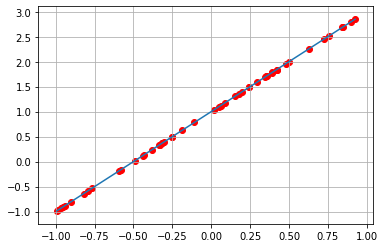

In [134]:
# plot training and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [149]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [150]:
# get a summary of our composed model
model.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [151]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
16/16 [==============================] - 0s 16ms/step - loss: 2.2137 - mse: 2.2137 - val_loss: 1.6081 - val_mse: 1.6081
Epoch 2/30
16/16 [==============================] - 0s 7ms/step - loss: 1.5752 - mse: 1.5752 - val_loss: 1.1730 - val_mse: 1.1730
Epoch 3/30
16/16 [==============================] - 0s 8ms/step - loss: 1.1603 - mse: 1.1603 - val_loss: 0.8821 - val_mse: 0.8821
Epoch 4/30
16/16 [==============================] - 0s 7ms/step - loss: 0.8775 - mse: 0.8775 - val_loss: 0.6805 - val_mse: 0.6805
Epoch 5/30
16/16 [==============================] - 0s 8ms/step - loss: 0.6780 - mse: 0.6780 - val_loss: 0.5327 - val_mse: 0.5327
Epoch 6/30
16/16 [==============================] - 0s 6ms/step - loss: 0.5301 - mse: 0.5301 - val_loss: 0.4208 - val_mse: 0.4208
Epoch 7/30
16/16 [==============================] - 0s 10ms/step - loss: 0.4179 - mse: 0.4179 - val_loss: 0.3347 - val_mse: 0.3347
Epoch 8/30
16/16 [==============================] - 0s 6ms/step - loss: 0.3315 - mse: 0.

In [152]:
# return weights
model.get_weights()

[array([[1.9169943]], dtype=float32), array([0.9991591], dtype=float32)]

In [153]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 3ms/step - loss: 0.0022 - mse: 0.0022

Test loss: 0.002191246720030904
Test accuracy: 0.002191246720030904


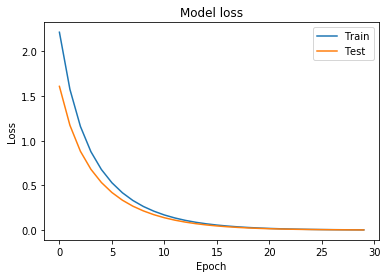

In [154]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

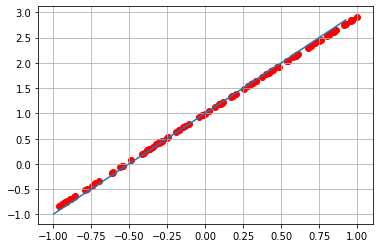

In [155]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

È stato sufficiente incrementare il data training ad $N_{train} = 500$ per migliorare nettamente le prestazioni.

### Exercise 11.2

#### Polinomial Fit

$$
f(x)=4-3x-2x^2+3x^3
$$
per $x \in [-1,1]$.

In [156]:
# target parameters of f(x) = a x^3 + b x^2 + c x + d
a = 3  # coefficient o(x^3)
b = -2 # coefficient o(x^2)
c = -3 # coefficient o(x)
d = 4  # costant

In [157]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = a * x_valid**3 + b * x_valid**2 + c * x_valid + d # ideal (target) function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a * x_train**3 + b * x_train**2 + c * x_train + d, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a * x_valid**3 + b * x_valid**2 + c * x_valid + d, sigma)

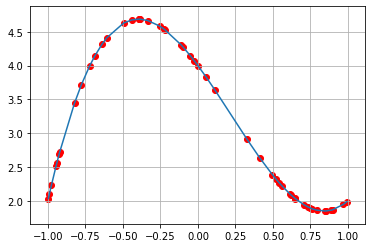

In [158]:
# plot training and target dataset
import matplotlib.pyplot as plt
x = np.linspace(-1,1,1000)
plt.plot( x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.grid(True); plt.show()

In [159]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(2, input_shape=(1,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

model1 = tf.keras.Sequential()
model1.add(Dense(2, input_shape=(1,)))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(1))

model1.compile(optimizer='Adam', loss='mse', metrics=['mse'])

model2 = tf.keras.Sequential()
model2.add(Dense(2, input_shape=(1,)))
model2.add(Dense(200, activation='relu'))
model2.add(Dense(132, activation='relu'))
model2.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model2.compile(optimizer='Adam', loss='mae', metrics=['mae'])

model3 = tf.keras.Sequential()
model3.add(Dense(2, input_shape=(1,)))
model3.add(Dense(200, activation='relu'))
model3.add(Dense(132, activation='relu'))
model3.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model3.compile(optimizer='Adam', loss='mse', metrics=['mse'])

In [160]:
# get a summary of our composed model
model.summary()
model1.summary()
model2.summary()
model3.summary()

Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_107 (Dense)            (None, 2)                 4         
_________________________________________________________________
dense_108 (Dense)            (None, 100)               300       
_________________________________________________________________
dense_109 (Dense)            (None, 1)                 101       
Total params: 405
Trainable params: 405
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            (None, 2)                 4         
_________________________________________________________________
dense_111 (Dense)            (None, 100)               300       
________________________________

In [161]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=200, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

history1 = model1.fit(x=x_train, y=y_train, 
          batch_size=200, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

history2 = model2.fit(x=x_train, y=y_train, 
          batch_size=200, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

history3 = model3.fit(x=x_train, y=y_train, 
          batch_size=200, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
50/50 [==============================] - 0s 8ms/step - loss: 3.3275 - mse: 3.3275 - val_loss: 0.8928 - val_mse: 0.8928
Epoch 2/30
50/50 [==============================] - 0s 5ms/step - loss: 0.5749 - mse: 0.5749 - val_loss: 0.8351 - val_mse: 0.8351
Epoch 3/30
50/50 [==============================] - 0s 4ms/step - loss: 0.5178 - mse: 0.5178 - val_loss: 0.8002 - val_mse: 0.8002
Epoch 4/30
50/50 [==============================] - 0s 5ms/step - loss: 0.4886 - mse: 0.4886 - val_loss: 0.7617 - val_mse: 0.7617
Epoch 5/30
50/50 [==============================] - 0s 5ms/step - loss: 0.4601 - mse: 0.4601 - val_loss: 0.7295 - val_mse: 0.7295
Epoch 6/30
50/50 [==============================] - 0s 5ms/step - loss: 0.4295 - mse: 0.4295 - val_loss: 0.6901 - val_mse: 0.6901
Epoch 7/30
50/50 [==============================] - 0s 6ms/step - loss: 0.3972 - mse: 0.3972 - val_loss: 0.6302 - val_mse: 0.6302
Epoch 8/30
50/50 [==============================] - 0s 5ms/step - loss: 0.3629 - mse: 0.36

50/50 [==============================] - 0s 7ms/step - loss: 0.2930 - mae: 0.2930 - val_loss: 0.2634 - val_mae: 0.2634
Epoch 4/30
50/50 [==============================] - 0s 7ms/step - loss: 0.1265 - mae: 0.1265 - val_loss: 0.1352 - val_mae: 0.1352
Epoch 5/30
50/50 [==============================] - 0s 8ms/step - loss: 0.0633 - mae: 0.0633 - val_loss: 0.0787 - val_mae: 0.0787
Epoch 6/30
50/50 [==============================] - 0s 7ms/step - loss: 0.0494 - mae: 0.0494 - val_loss: 0.0483 - val_mae: 0.0483
Epoch 7/30
50/50 [==============================] - 0s 8ms/step - loss: 0.0297 - mae: 0.0297 - val_loss: 0.0329 - val_mae: 0.0329
Epoch 8/30
50/50 [==============================] - 0s 7ms/step - loss: 0.0292 - mae: 0.0292 - val_loss: 0.0317 - val_mae: 0.0317
Epoch 9/30
50/50 [==============================] - 1s 10ms/step - loss: 0.0315 - mae: 0.0315 - val_loss: 0.0411 - val_mae: 0.0411
Epoch 10/30
50/50 [==============================] - 0s 6ms/step - loss: 0.0275 - mae: 0.0275 - val_

In [162]:
# return weights
model.get_weights()
model1.get_weights()
model2.get_weights()
model3.get_weights()

[array([[1.1798608, 1.0888456]], dtype=float32),
 array([-0.04722642, -0.02133742], dtype=float32),
 array([[ 7.03224838e-02,  1.19497679e-01,  1.51606202e-01,
         -8.05389322e-03,  9.13920328e-02, -1.54527947e-01,
          1.08600415e-01,  2.66629434e-03, -9.09334794e-02,
         -9.33263749e-02,  1.15472756e-01,  3.68266087e-03,
          3.17395441e-02, -1.18977048e-01, -7.13937059e-02,
          2.04089716e-01, -9.43220034e-03, -1.09585911e-01,
          9.91498008e-02, -2.82891151e-02, -1.48246184e-01,
         -1.07721187e-01,  1.91903524e-02,  8.28331932e-02,
          1.53926656e-01,  9.38526914e-03, -6.91870674e-02,
         -2.21648868e-02, -1.19430915e-01,  1.22888647e-01,
          1.35097846e-01, -1.10836886e-01,  1.42371431e-01,
          2.87655294e-02, -3.94904017e-02, -6.81146160e-02,
         -1.38797998e-01, -1.34783670e-01,  4.90376055e-02,
          9.02779698e-02, -6.35393485e-02,  2.33310200e-02,
          1.22450562e-02,  2.09158491e-02,  1.49876043e-01,


In [163]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score1 = model1.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

score2 = model2.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

score3 = model3.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

2/2 [==============================] - 0s 2ms/step - loss: 0.0473 - mse: 0.0473

Test loss: 0.04734437167644501
Test accuracy: 0.04734437167644501
2/2 [==============================] - 0s 11ms/step - loss: 0.0101 - mse: 0.0101

Test loss: 0.010146118700504303
Test accuracy: 0.010146118700504303
2/2 [==============================] - 0s 5ms/step - loss: 0.0144 - mae: 0.0144

Test loss: 0.01443540770560503
Test accuracy: 0.01443540770560503
2/2 [==============================] - 0s 2ms/step - loss: 8.4361e-04 - mse: 8.4361e-04

Test loss: 0.0008436073549091816
Test accuracy: 0.0008436073549091816


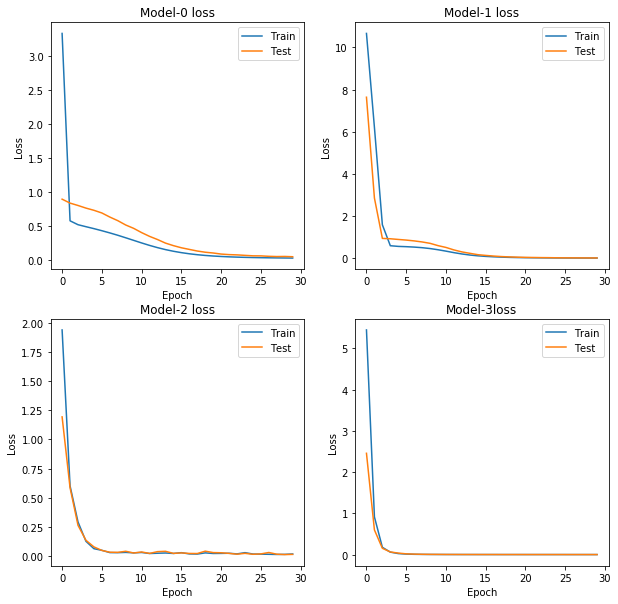

In [164]:
# look into training history
# Plot training & validation loss values

fig = plt.figure(figsize=(10,10))
ax = ax1 = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_title('Model-0 loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Train', 'Test'], loc='best')

ax1.plot(history1.history['loss'])
ax1.plot(history1.history['val_loss'])
ax1.set_title('Model-1 loss')
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
ax1.legend(['Train', 'Test'], loc='best')

ax2.plot(history2.history['loss'])
ax2.plot(history2.history['val_loss'])
ax2.set_title('Model-2 loss')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
ax2.legend(['Train', 'Test'], loc='best')

ax3.plot(history3.history['loss'])
ax3.plot(history3.history['val_loss'])
ax3.set_title('Model-3loss')
ax3.set_ylabel('Loss')
ax3.set_xlabel('Epoch')
ax3.legend(['Train', 'Test'], loc='best')

plt.show()

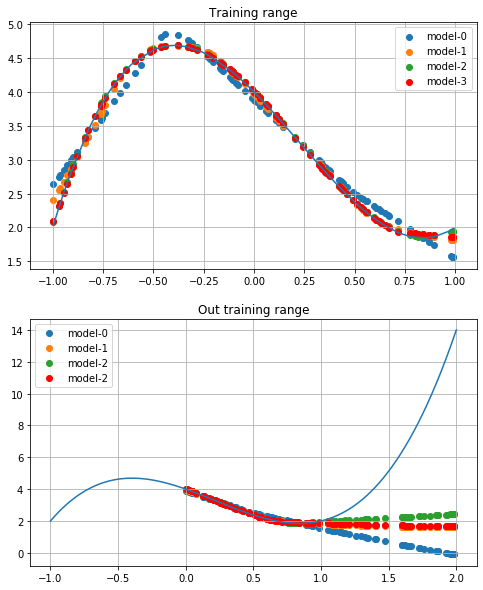

In [165]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

x_p = np.random.uniform(-1, 1, 100)
y_p = model.predict(x_p)
y1_p = model1.predict(x_p)
y2_p = model2.predict(x_p)
y3_p = model3.predict(x_p)

ax.scatter(x_p, y_p,label='model-0')
ax.scatter(x_p, y1_p,label='model-1')
ax.scatter(x_p, y2_p,label='model-2')
ax.scatter(x_p, y3_p,color='red',label='model-3')
ax.plot(x_valid, y_target)
ax.set_title('Training range')
ax.grid(True)
ax.legend()

x_p = np.random.uniform(0, 2, 100)
y_p = model.predict(x_p)
y1_p = model1.predict(x_p)
y2_p = model2.predict(x_p)
y3_p = model3.predict(x_p)
x = np.linspace(-1,2,1000)

ax2.scatter(x_p, y_p,label='model-0')
ax2.scatter(x_p, y1_p, label='model-1')
ax2.scatter(x_p, y2_p, label='model-2')
ax2.scatter(x_p, y3_p,color='red', label='model-2')
ax2.plot( x, a * x**3 + b * x**2 + c * x + d)
ax2.set_title('Out training range')
ax2.grid(True)
ax2.legend()

plt.show()

Si può vedere come all'aumentare del numero di layer e di neuroni per ciascun layer la rete sembra migliorare le proprie prestazioni sulla predizione. L'utilizzo dell'optimizer *Adam* migliora notevolemente le prestazioni della rete rispetto al *SGD*. La loss function *mae* sembra portare a prestazioni inferiori rispetto alla *mse*.

All'interno dell'intervallo di training la rete migliore predice correttamente la posizione dei punti, a meno di un piccolo scostamento all'estremo destro.
Al di fuori dell'intervallo di training la rete non riesce minimamente a predirre i punti correttamente.

### Exercise 11.3
#### Trigonometric 2D function fit
  
$$
f(x,y) = \sin(x^2+y^2)
$$
nel range $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.

In [221]:
# target parameters of f(x) = a x^3 + b x^2 + c x + d
a = 1  # coefficient sin
b = 1 # coefficient x^2
c = 1 # coefficient y^2

In [222]:
import numpy as np
from numpy import sin

n_train = 5000
n_valid = 1000
# generate synthetic training dataset
xy_train = np.zeros((n_train, 2))
# generate synthetic validation data
xy_valid = np.zeros((n_valid, 2))
x_valid = np.random.uniform(-3/2,3/2,n_valid)
y_valid = np.random.uniform(-3/2,3/2,n_valid)

z_target = np.zeros(n_train)
for i in range(n_train):
    xy_train[i,0] = np.random.uniform(-3/2,3/2)
    xy_train[i,1] = np.random.uniform(-3/2,3/2)
    z_target[i] = a * sin(b * xy_train[i,0]**2 + c * xy_train[i,1]**2) # ideal(target) function

z_valid = np.zeros(n_valid)
for i in range(n_valid):
    xy_valid[i,0] = np.random.uniform(-3/2,3/2)
    xy_valid[i,1] = np.random.uniform(-3/2,3/2)
    z_valid[i] = a * sin(b * x_valid[i]**2 + c * y_valid[i]**2) # ideal(target) function

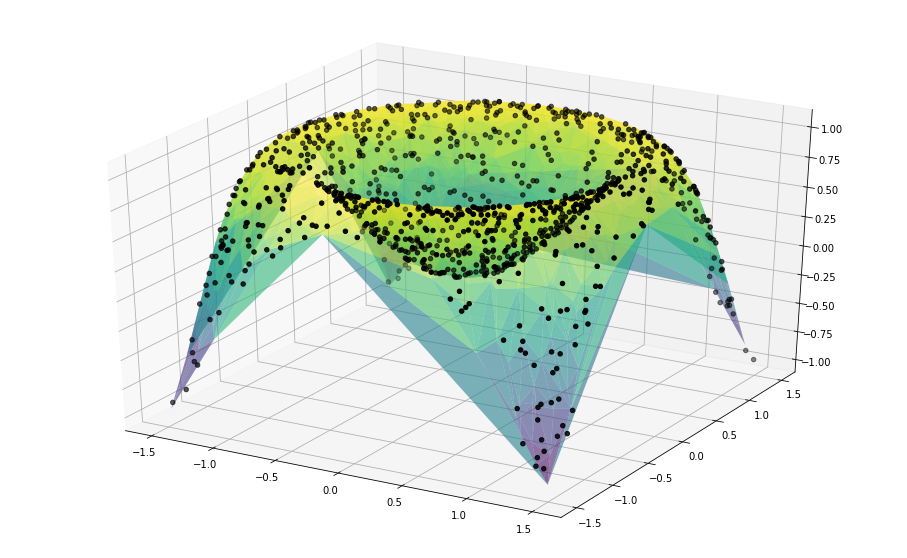

In [223]:
# plot target dataset
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(projection='3d')

x = np.random.uniform(-3/2,3/2,1000)
y = np.random.uniform(-3/2,3/2,1000)
z = a * sin(b * x**2 + c * y**2)


ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none', alpha = 0.6)
ax.scatter(x_valid, y_valid, z_valid, c='black')

plt.show()

In [224]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(200, input_shape=(2,), activation='relu'))
model.add(Dense(132, activation='relu'))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [225]:
# get a summary of our composed model
model.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (None, 200)               600       
_________________________________________________________________
dense_140 (Dense)            (None, 132)               26532     
_________________________________________________________________
dense_141 (Dense)            (None, 1)                 133       
Total params: 27,265
Trainable params: 27,265
Non-trainable params: 0
_________________________________________________________________


In [226]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=xy_train, y=z_target,
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(xy_valid, z_valid))

Epoch 1/50
157/157 [==============================] - 1s 5ms/step - loss: 0.1744 - mse: 0.1744 - val_loss: 0.1596 - val_mse: 0.1596
Epoch 2/50
157/157 [==============================] - 2s 11ms/step - loss: 0.1396 - mse: 0.1396 - val_loss: 0.1609 - val_mse: 0.1609
Epoch 3/50
157/157 [==============================] - 1s 5ms/step - loss: 0.1344 - mse: 0.1344 - val_loss: 0.1603 - val_mse: 0.1603
Epoch 4/50
157/157 [==============================] - 1s 5ms/step - loss: 0.1301 - mse: 0.1301 - val_loss: 0.1604 - val_mse: 0.1604
Epoch 5/50
157/157 [==============================] - 1s 5ms/step - loss: 0.1265 - mse: 0.1265 - val_loss: 0.1625 - val_mse: 0.1625
Epoch 6/50
157/157 [==============================] - 1s 4ms/step - loss: 0.1231 - mse: 0.1231 - val_loss: 0.1623 - val_mse: 0.1623
Epoch 7/50
157/157 [==============================] - 1s 4ms/step - loss: 0.1196 - mse: 0.1196 - val_loss: 0.1630 - val_mse: 0.1630
Epoch 8/50
157/157 [==============================] - 1s 5ms/step - loss: 0

In [227]:
# return weights
model.get_weights()

[array([[-0.21845025, -0.17526174, -0.11913972,  0.14176735, -0.00162428,
          0.10204966,  0.00750896, -0.02254913,  0.22247064, -0.2088062 ,
         -0.0099696 , -0.11281004,  0.14424895, -0.11595788, -0.02297683,
          0.06134003, -0.03164397,  0.16216825,  0.10386406, -0.02149834,
          0.09880169, -0.18260092, -0.19884901,  0.19159007,  0.19894944,
          0.04808251, -0.15961976,  0.06847411,  0.01113059, -0.00537868,
         -0.00469644, -0.15649836,  0.1668277 , -0.0470502 ,  0.19579285,
          0.07718179,  0.3075662 , -0.1539446 , -0.04666288, -0.0702268 ,
         -0.04449106, -0.12809336,  0.08396593, -0.197467  , -0.09188764,
          0.02986641,  0.17969704,  0.20668055,  0.17287426, -0.18227528,
         -0.02123734,  0.14826249,  0.09038811, -0.22731274,  0.06131855,
         -0.12286101, -0.00626786,  0.1718325 ,  0.19470312, -0.05510388,
          0.17774372, -0.03861181, -0.19329478,  0.08833851, -0.18176466,
          0.27359524, -0.16605765,  0.

In [228]:
# evaluate model
score = model.evaluate(xy_valid, z_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

32/32 [==============================] - 0s 5ms/step - loss: 0.2822 - mse: 0.2822

Test loss: 0.2822176218032837
Test accuracy: 0.2822176218032837


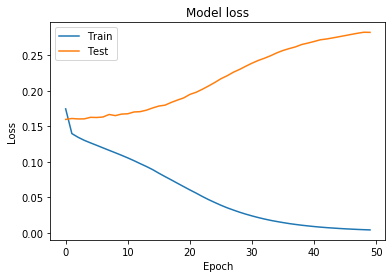

In [229]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

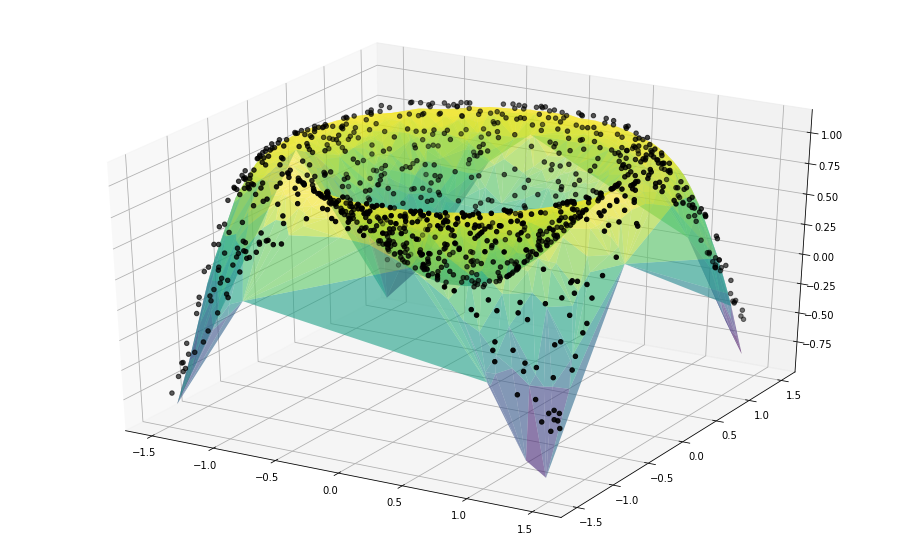

In [232]:
n_test = 1000
xy_test = np.zeros((n_test, 2))
x_p = np.zeros(n_test)
y_p = np.zeros(n_test)
for i in range(n_test):
    xy_test[i,0] = np.random.uniform(-3/2,3/2)
    xy_test[i,1] = np.random.uniform(-3/2,3/2)
    x_p[i] = xy_test[i,0]
    y_p[i] = xy_test[i,1]
    
z_p = model.predict(xy_test)

fig = plt.figure(figsize=(16,10))
ax = fig.gca(projection='3d')

x = np.random.uniform(-3/2,3/2,1000)
y = np.random.uniform(-3/2,3/2,1000)
z = a * sin(b * x**2 + c * y**2)

ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none', alpha=0.6)
ax.scatter(x_p, y_p, z_p, c='black')

plt.show()


La rete riesce a predirre correttamente i punti sulla superficie.